In [ ]:

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**Data pre-processing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.duplicated().sum()

np.int64(52)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df.replace('?',np.nan,inplace=True)

In [ ]:
df.isna().sum()

,0
age,0
workclass,2795
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2805
relationship,0
race,0
gender,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df.shape

(45175, 15)

In [ ]:
df.drop('fnlwgt',axis=1,inplace=True)

In [ ]:
df.dtypes

,0
age,int64
workclass,object
education,object
educational-num,int64
marital-status,object
occupation,object
relationship,object
race,object
gender,object
capital-gain,int64


In [ ]:
df['income'].value_counts()

,count
income,
<=50K,33973
>50K,11202


**Data Visualization**

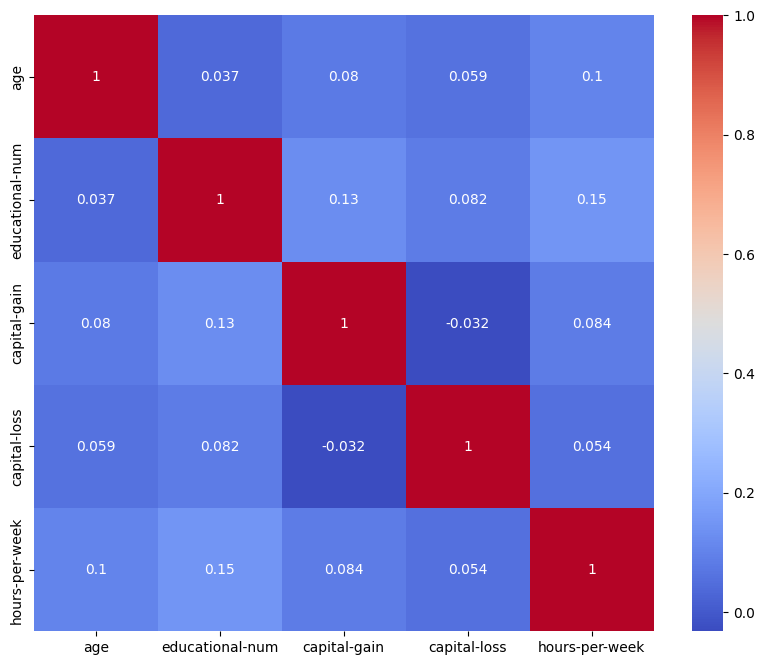

In [ ]:
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

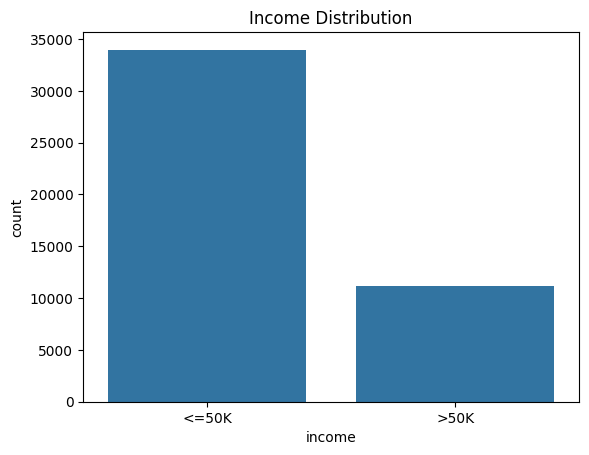

In [ ]:
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

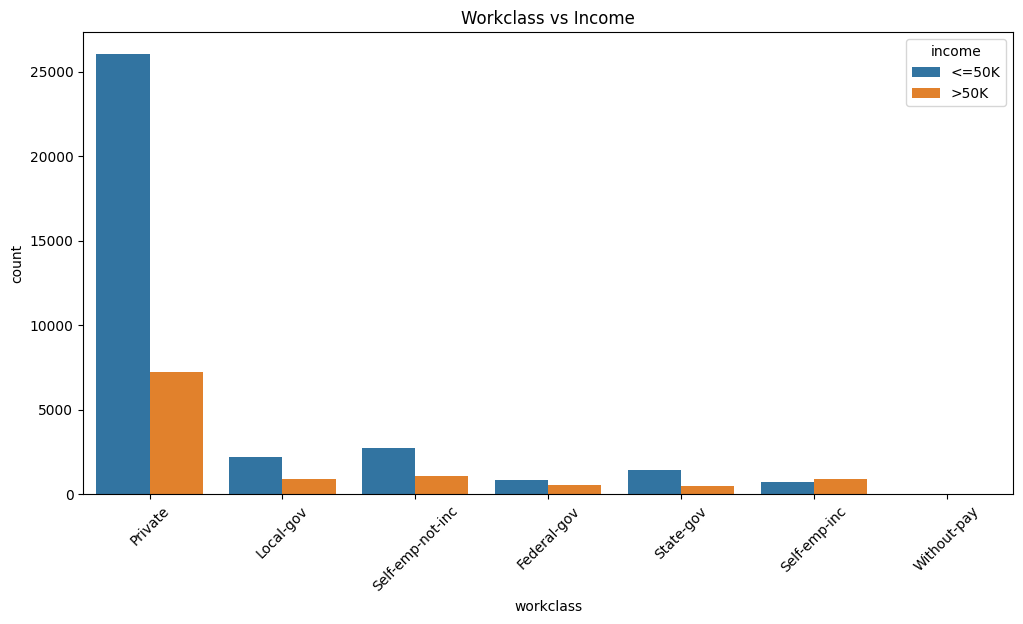

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Workclass vs Income')
plt.xticks(rotation=45)
plt.show()

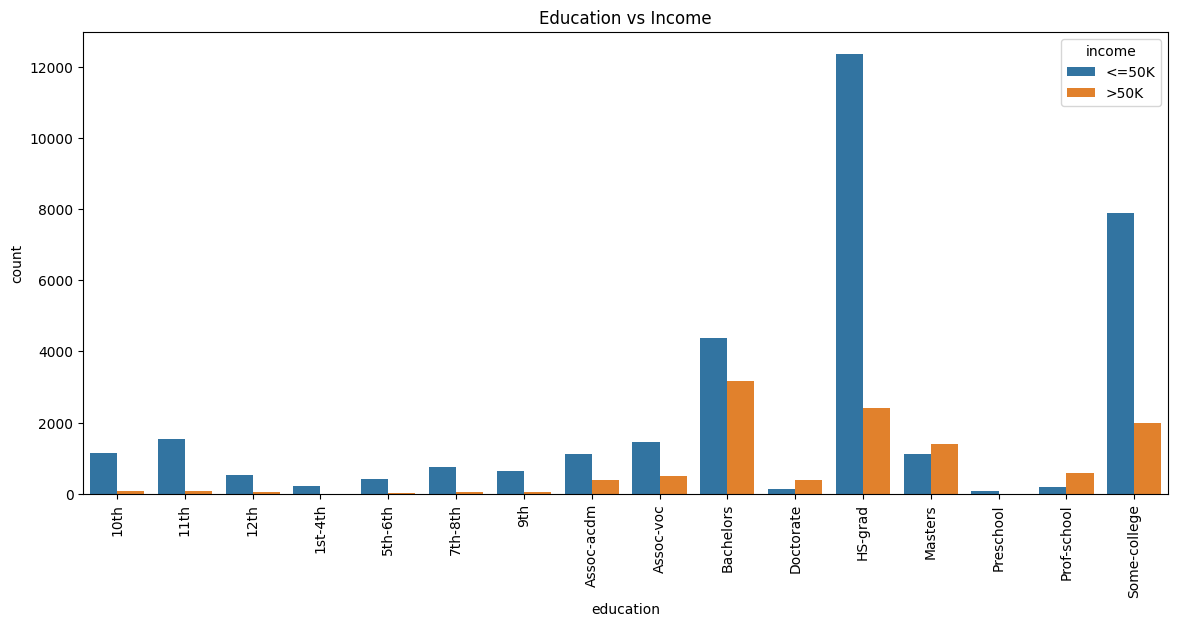

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x='education', hue='income', data=df, order=sorted(df['education'].unique()))
plt.title('Education vs Income')
plt.xticks(rotation=90)
plt.show()

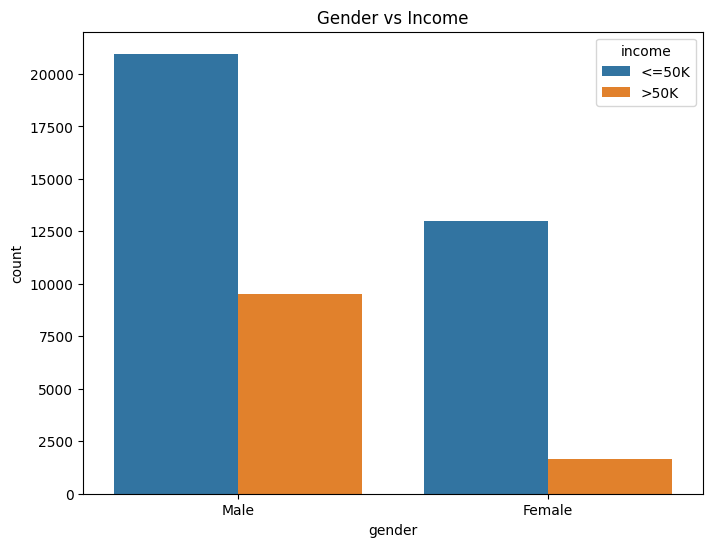

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='income', data=df)
plt.title('Gender vs Income')
plt.show()

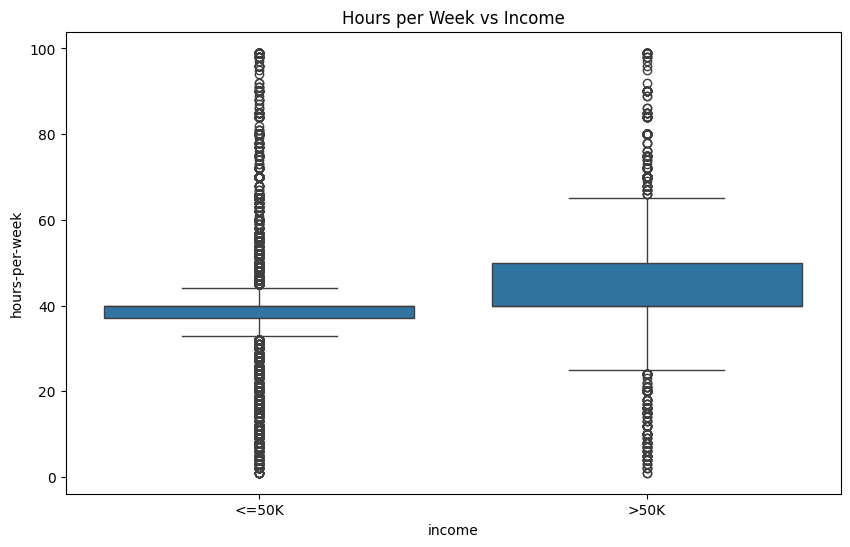

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week vs Income')
plt.show()

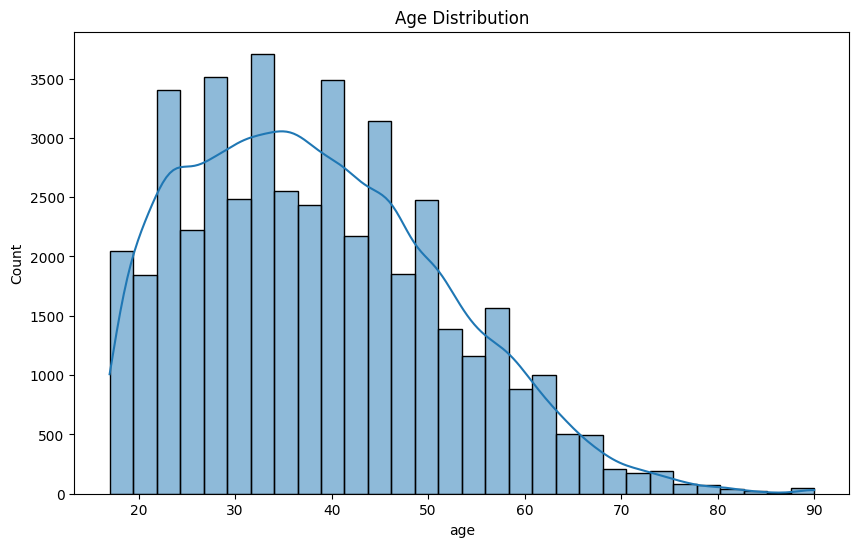

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

Label **Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
df['income'].value_counts()
df.head()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.dtypes
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,0,6,4,7,1,4,1,0,0,30,38,0


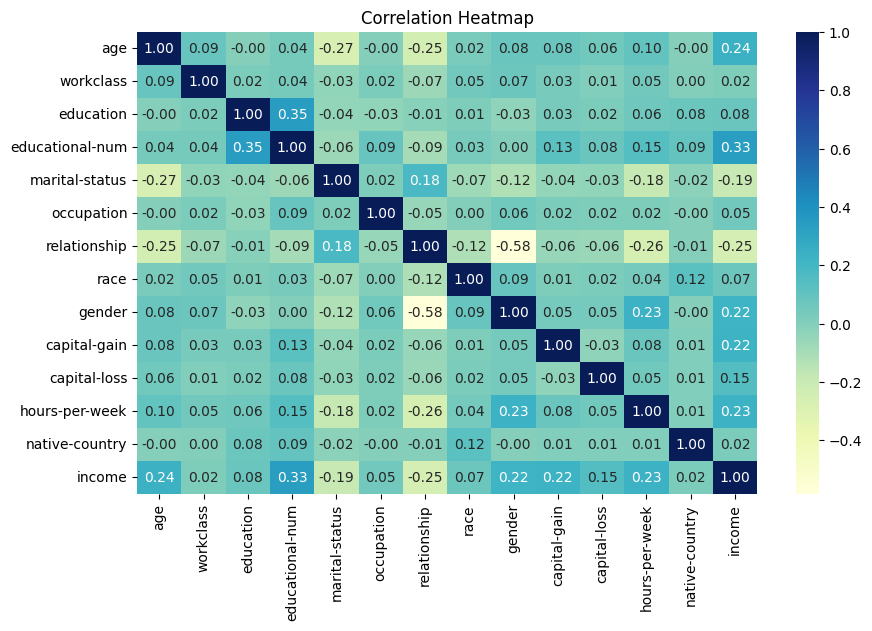

In [ ]:
corr=df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Splitting** data

In [ ]:
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
X.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,1,7,4,6,3,2,1,0,0,40,38
1,38,2,11,9,2,4,0,4,1,0,0,50,38
2,28,1,7,12,2,10,0,4,1,0,0,40,38
3,44,2,15,10,2,6,0,2,1,7688,0,40,38
5,34,2,0,6,4,7,1,4,1,0,0,30,38


In [ ]:
y.head()

,income
0,0
1,0
2,1
3,1
5,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20, random_state=100)

In [ ]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (36140, 13)  y_train =  (36140,)
X_test  =  (9035, 13)  y_test  =  (9035,)


Data **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
X.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.109589,2,1,7,4,6,3,2,1,0.000000,0.0,0.397959,38
1,0.287671,2,11,9,2,4,0,4,1,0.000000,0.0,0.500000,38
2,0.150685,1,7,12,2,10,0,4,1,0.000000,0.0,0.397959,38
3,0.369863,2,15,10,2,6,0,2,1,0.076881,0.0,0.397959,38
5,0.232877,2,0,6,4,7,1,4,1,0.000000,0.0,0.295918,38


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score, accuracy_score, precision_score, recall_score, f1_score

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
models ={
    "Logistic Regression":LogisticRegression(),}

In [ ]:
accuracy = []
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train","Acc_Test","pre_Test","Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,pre_Test,Rec_Test,F1_Test
Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# %%
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix,classification_report

In [ ]:
# Get the Logistic Regression model from the dictionary
logistic_model = models["Logistic Regression"]

In [ ]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

In [ ]:
# Now call classification_report with the actual predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6807
           1       0.68      0.41      0.51      2228

    accuracy                           0.81      9035
   macro avg       0.75      0.67      0.69      9035
weighted avg       0.79      0.81      0.79      9035



Support-Vector-machines

In [ ]:
from sklearn.metrics import accuracy_score ,classification_report,f1_score,precision_score,recall_score
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel='rbf', C=5)
classifier.fit(X_train, y_train)
acc_train = classifier.score(X_train,y_train)
print(acc_train)

y_pred = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

0.8013835085777532
0.8089651355838406


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6807
           1       0.84      0.28      0.42      2228

    accuracy                           0.81      9035
   macro avg       0.82      0.63      0.65      9035
weighted avg       0.81      0.81      0.77      9035



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan',p=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [ ]:
knn.score(X_test,y_test)

0.843940232429441

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix , accuracy_score
print(confusion_matrix(y_test,pred))

[[6176  631]
 [ 779 1449]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6807
           1       0.70      0.65      0.67      2228

    accuracy                           0.84      9035
   macro avg       0.79      0.78      0.79      9035
weighted avg       0.84      0.84      0.84      9035



In [ ]:
error_rate = []
accuracy = []
for i in range(1,20):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,pred_i ))
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
accuracy

[0.8151632540121748,
 0.8346430547869397,
 0.8307692307692308,
 0.8394023242944106,
 0.8339789706696181,
 0.8425013835085777,
 0.8391809629219701,
 0.8456004427227449,
 0.8437188710570006,
 0.844382955174322,
 0.8437188710570006,
 0.8465965688987271,
 0.8432761483121195,
 0.8450470392916436,
 0.8410625345877144,
 0.8447149972329828,
 0.842169341449917,
 0.8437188710570006,
 0.8420586607636967]

In [ ]:
error_rate

[np.float64(0.18483674598782512),
 np.float64(0.16535694521306032),
 np.float64(0.16923076923076924),
 np.float64(0.1605976757055894),
 np.float64(0.16602102933038185),
 np.float64(0.15749861649142224),
 np.float64(0.1608190370780299),
 np.float64(0.15439955727725513),
 np.float64(0.15628112894299945),
 np.float64(0.15561704482567792),
 np.float64(0.15628112894299945),
 np.float64(0.15340343110127283),
 np.float64(0.15672385168788047),
 np.float64(0.1549529607083564),
 np.float64(0.15893746541228557),
 np.float64(0.15528500276701715),
 np.float64(0.15783065855008302),
 np.float64(0.15628112894299945),
 np.float64(0.15794133923630327)]

Text(0, 0.5, 'Accuracy')

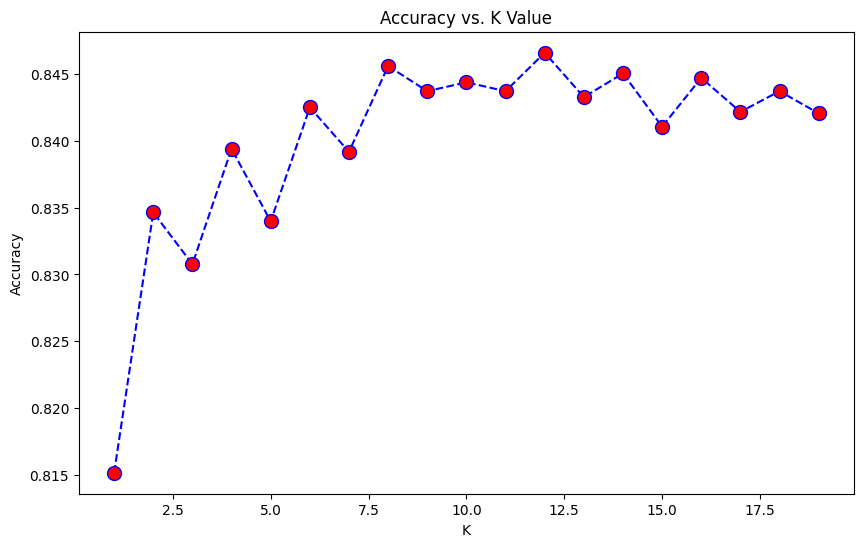

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy,color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,ComplementNB,MultinomialNB,CategoricalNB
NBModel = GaussianNB()
NBModel.fit(X_train,y_train)
print('NBModel Train Score is : ',NBModel.score(X_train,y_train))
print('NBModel Test Score is : ',NBModel.score(X_test,y_test))

NBModel Train Score is :  0.7956004427227449
NBModel Test Score is :  0.800442722744881


In [ ]:
y_pred=NBModel.predict(X_test)

In [ ]:
print('actual Output  : ',(y_test[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [0, 0, 1, 0, 1]
predict output :  [1, 0, 1, 0, 1]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6807
           1       0.69      0.34      0.46      2228

    accuracy                           0.80      9035
   macro avg       0.75      0.65      0.67      9035
weighted avg       0.79      0.80      0.77      9035



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
DT = DecisionTreeClassifier()

In [ ]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(X_train, y_train)

0.9733812949640288

In [ ]:
DT.score(X_test, y_test)

0.8146098505810736

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.800442722744881


In [ ]:
y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6807
           1       0.62      0.63      0.62      2228

    accuracy                           0.81      9035
   macro avg       0.75      0.75      0.75      9035
weighted avg       0.81      0.81      0.81      9035



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report # Import classification_report

In [ ]:
# Change from RandomForestRegressor to RandomForestClassifier
RT = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=100)

In [ ]:
RT.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=100)

In [ ]:
RT.score(X_train,y_train)

0.8622302158273382

In [ ]:
y_pred = RT.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.8576646375207526


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6807
           1       0.81      0.55      0.66      2228

    accuracy                           0.86      9035
   macro avg       0.84      0.76      0.78      9035
weighted avg       0.85      0.86      0.85      9035

